# Sales order data exploration

Use the code in this notebook to explore sales order data.


# Load data into a dataframe

In [3]:


df = spark.read.format("csv").option("header","true").load("abfss://MicrosoftLearn@onelake.dfs.fabric.microsoft.com/MicrosoftLearn_LH.Lakehouse/Files/Orders/2019.csv")

# df now is a Spark DataFrame containing CSV data from "abfss://MicrosoftLearn@onelake.dfs.fabric.microsoft.com/MicrosoftLearn_LH.Lakehouse/Files/Orders/2019.csv".
display(df.head(10))

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, a9307ebd-b20d-4f07-b1fe-7b60fa8f520f)

In [3]:
## Load 2019.csv file 
# without header 
# cus the table doesnt have header 

df = spark.read.format("csv").option("header","false").load("abfss://MicrosoftLearn@onelake.dfs.fabric.microsoft.com/MicrosoftLearn_LH.Lakehouse/Files/Orders/2019.csv") 

# df now is a Spark DataFrame containing CSV data from "Files/orders/2019.csv".
display(df.head(10))

StatementMeta(, a2231cba-6a46-4f8d-a9a3-35222fcfef61, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, 025e8d49-0362-430a-95c2-1a044d6b465c)

In [6]:
# create a new schema for the df 
##read the 2019 sales order data

from pyspark.sql.types import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
    ])

df = spark.read.format("csv").schema(orderSchema).load("abfss://MicrosoftLearn@onelake.dfs.fabric.microsoft.com/MicrosoftLearn_LH.Lakehouse/Files/Orders/2019.csv")
display(df.head(10))

StatementMeta(, a2231cba-6a46-4f8d-a9a3-35222fcfef61, 8, Finished, Available)

SynapseWidget(Synapse.DataFrame, d69d61c8-1c54-45ed-ad43-27ae3161f78b)

In [13]:
 #read the sales order data from all of the files in the orders folder
 # with th schema created 
 
 from pyspark.sql.types import *

 orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
    ])

 df = spark.read.format("csv").schema(orderSchema).load("abfss://MicrosoftLearn@onelake.dfs.fabric.microsoft.com/MicrosoftLearn_LH.Lakehouse/Files/Orders/*.csv")
display(df.head(10))

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 15, Finished, Available)

SynapseWidget(Synapse.DataFrame, 8b3a770a-6c09-408f-80cb-b36324333dd5)

# Explore data in a dataframe

In [7]:
#Filter a dataframe
#a new customers dataframe is created by selecting a specific subset of columns from the df dataframe
# The dataframe['Field1', 'Field2', ...] syntax is a shorthand way of defining a subset of columns.

customers = df['CustomerName', 'Email']
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

## # You can also use select method, so the first line of the code above could be written as:
# customers = df.select("CustomerName", "Email")

StatementMeta(, 0c8648e7-773b-43c1-8eea-7ed91c0bf466, 9, Finished, Available)

32718
12427


SynapseWidget(Synapse.DataFrame, 6e7a0f6a-7d6f-40eb-b581-aa9d2ea1f791)

In [8]:
## select two columns for the df 

customers2 = df.select("CustomerName", "Email")

display(customers2)

StatementMeta(, 0c8648e7-773b-43c1-8eea-7ed91c0bf466, 10, Finished, Available)

SynapseWidget(Synapse.DataFrame, 4ffafb73-782c-49b6-bb93-e0699ce1f255)

In [5]:
# Filter a dataframe
# a new customers dataframe is created by selecting a specific subset of columns from the df dataframe
# The dataframe['Field1', 'Field2', ...] syntax is a shorthand way of defining a subset of columns.

Sales_df = df['CustomerName', 'OrderDate', 'SalesOrderNumber', 'SalesOrderLineNumber']
print(Sales_df.count())
print(Sales_df.distinct().count())

#display(Sales_df(10))
display(Sales_df)

StatementMeta(, 0c8648e7-773b-43c1-8eea-7ed91c0bf466, 7, Finished, Available)

32718
32718


SynapseWidget(Synapse.DataFrame, 2e327230-79d8-4916-8214-27a3531121f5)

In [11]:
# Run the modified code to view the customers who have purchased the Road-250 Red, 52 product. 

customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

StatementMeta(, a2231cba-6a46-4f8d-a9a3-35222fcfef61, 13, Finished, Available)

133
133


SynapseWidget(Synapse.DataFrame, 4ae6b857-6767-4b04-9d58-4fe996382c5e)

In [10]:
## filter using the where 

customers = df.select("CustomerName", "Email", "item").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

StatementMeta(, 0c8648e7-773b-43c1-8eea-7ed91c0bf466, 12, Finished, Available)

133
133


SynapseWidget(Synapse.DataFrame, c6150e36-49f4-4b1e-a265-1fc5f8e7fcb0)

# Aggregate and group data in a dataframe

In [12]:
# Run the code cell you added, and note that the results show the sum of order quantities grouped by product. 
# The groupBy method groups the rows by Item, 
# and the subsequent sum aggregate function is applied to all of the remaining numeric columns (in this case, Quantity)

productSales = df.select("Item", "Quantity").groupBy("Item").sum()

display(productSales)

StatementMeta(, a2231cba-6a46-4f8d-a9a3-35222fcfef61, 14, Finished, Available)

SynapseWidget(Synapse.DataFrame, 32c7f888-e6c6-4932-82c2-2b0e7eedbba3)

In [20]:
productSaless = df.select("Item", "Quantity").groupBy("Item").sum()

display(productSaless)

StatementMeta(, 0c8648e7-773b-43c1-8eea-7ed91c0bf466, 22, Finished, Available)

SynapseWidget(Synapse.DataFrame, c019b955-d688-48ee-8ca1-3c9f8eae2cea)

In [13]:
# the results show the number of sales orders per year. 
# Note that the select method includes a SQL year function 
# to extract the year component of the OrderDate field 
# (which is why the code includes an import statement to import functions from the Spark SQL library).
# It then uses an alias method to assign a column name to the extracted year value.
# The data is then grouped by the derived Year column and the count of rows in each group 
# this is calculated before finally the orderBy method is used to sort the resulting dataframe.

from pyspark.sql.functions import *

yearlySales = df.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")

display(yearlySales)

StatementMeta(, a2231cba-6a46-4f8d-a9a3-35222fcfef61, 15, Finished, Available)

SynapseWidget(Synapse.DataFrame, 77a844ff-528a-4cb3-8fa0-36bed4a9801d)

# Use dataframe methods and functions to transform data

In [14]:
display(df.limit(5))

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 16, Finished, Available)

SynapseWidget(Synapse.DataFrame, c7131031-2ccd-4703-9c64-a91255c7aaae)

In [19]:
# Add Year and Month columns based on the OrderDate column.
# Add FirstName and LastName columns based on the CustomerName column.
# Filter and reorder the columns, removing the CustomerName column.

from pyspark.sql.functions import *

## Create Year and Month columns
transformed_df = df.withColumn("Year", year(col("OrderDate"))).withColumn("Month", month(col("OrderDate"))).withColumn("Day", dayofmonth(col("OrderDate")))


# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))

# Filter and reorder columns
transformed_df = transformed_df["SalesOrderNumber", "SalesOrderLineNumber", "OrderDate", "Year", "Month", "Day", "FirstName", "LastName", "Email", "Item", "Quantity", "UnitPrice", "Tax"]

# Display the first five orders
display(transformed_df.limit(5))

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 21, Finished, Available)

SynapseWidget(Synapse.DataFrame, 5a0c6129-db7e-4333-a380-1902574222a3)

In [15]:
# Save the transformed data

transformed_df.write.mode("overwrite").parquet('Files/transformed_data/orders')

print ("Transformed data saved!")

StatementMeta(, a2231cba-6a46-4f8d-a9a3-35222fcfef61, 17, Finished, Available)

Transformed data saved!


In [21]:
# load a new dataframe from the parquet files in the transformed_orders/orders folder:

orders_df = spark.read.format("parquet").load("Files/transformed_data/orders")
display(orders_df.head(10))

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 23, Finished, Available)

SynapseWidget(Synapse.DataFrame, 2c528bcb-c854-49c2-823d-fe729f2239a7)

In [22]:
# Save data in partitioned files

orders_df.write.partitionBy("Year","Month").mode("overwrite").parquet("Files/partitioned_data")
print ("Transformed data saved!")

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 24, Finished, Available)

Transformed data saved!


In [23]:
#load the orders 2021 df  as a new dataframe from the orders.parquet file

orders_2021_df = spark.read.format("parquet").load("Files/partitioned_data/Year=2021/Month=*")

display(orders_2021_df.head(5))

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 25, Finished, Available)

SynapseWidget(Synapse.DataFrame, 57d04e9f-ba1a-4591-b6e3-b009ec3360ac)

# Work with tables and SQL

In [24]:
# Create a new table
df.write.format("delta").saveAsTable("salesorders")

# Get the table description
spark.sql("DESCRIBE EXTENDED salesorders").show(truncate=False)

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 26, Finished, Available)

+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                                            |comment|
+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|SalesOrderNumber            |string                                                                                                                               |null   |
|SalesOrderLineNumber        |int                                                                                                                                  |null   |
|OrderDate                   |date                                                                                                     

In [25]:
df = spark.sql("SELECT * \
                FROM MicrosoftLearn_LH.salesorders \
                LIMIT 1000")
display(df.head(10))

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 27, Finished, Available)

SynapseWidget(Synapse.DataFrame, 5387861d-daa0-4d22-ae3d-2d35e377079d)

In [26]:
# The %%sql line at the beginning of the cell (called a magic) 
# it indicates that the Spark SQL language runtime should be used to run the code in this cell instead of PySpark.
# The SQL code references the salesorders table that was created previously.

%%sql
SELECT YEAR(OrderDate) AS OrderYear,
       SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 28, Finished, Available)

<Spark SQL result set with 3 rows and 2 fields>

# Visualize data with Spark

In [36]:
%%sql

SELECT * FROM salesorders

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 38, Finished, Available)

<Spark SQL result set with 1000 rows and 9 fields>

In [33]:
%%sql

SELECT * FROM MicrosoftLearn_LH.salesorders LIMIT 1000

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 35, Finished, Available)

<Spark SQL result set with 1000 rows and 9 fields>

In [37]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
            FROM salesorders \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 39, Finished, Available)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 40, Finished, Available)

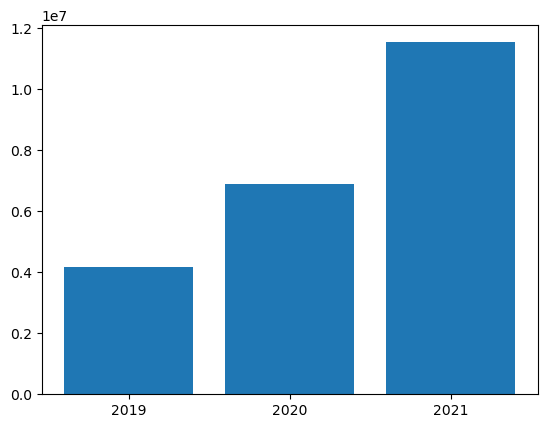

In [38]:
# The matplotlib library requires a Pandas dataframe, so you need to convert the Spark dataframe returned by the Spark SQL query to this format.
# At the core of the matplotlib library is the pyplot object. This is the foundation for most plotting functionality.
# The default settings result in a usable chart, but there’s considerable scope to customize it


from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

# Display the plot
plt.show()

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 41, Finished, Available)

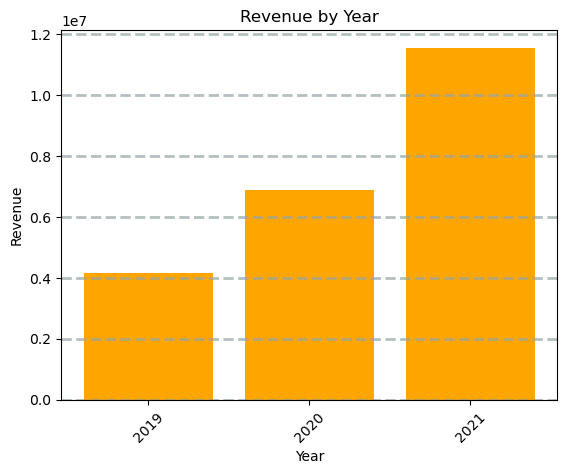

In [39]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 42, Finished, Available)

<Figure size 640x480 with 0 Axes>

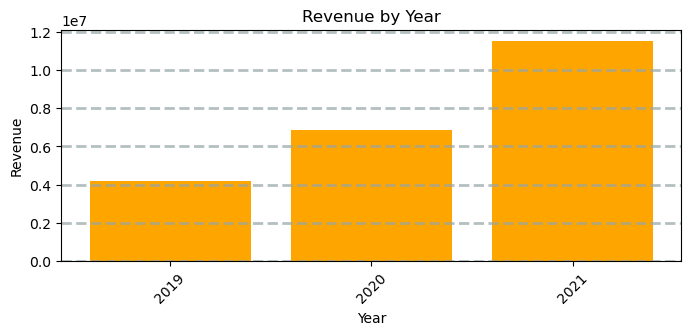

In [40]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 43, Finished, Available)

<Figure size 640x480 with 0 Axes>

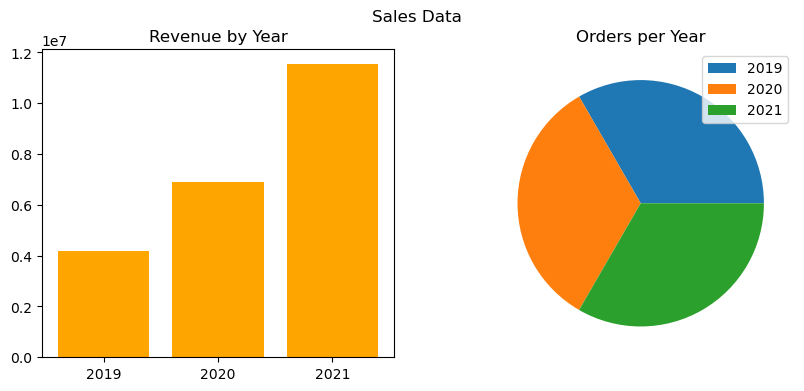

In [41]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')

# Create a pie chart of yearly order counts on the second axis
yearly_counts = df_sales['OrderYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Orders per Year')
ax[1].legend(yearly_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Sales Data')

# Show the figure
plt.show()

# Use the seaborn library

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 44, Finished, Available)

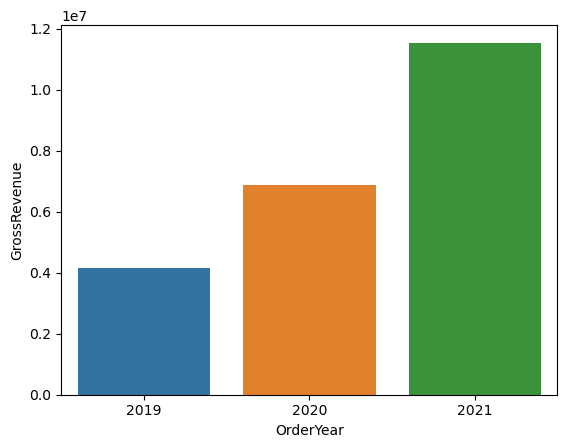

In [42]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 45, Finished, Available)

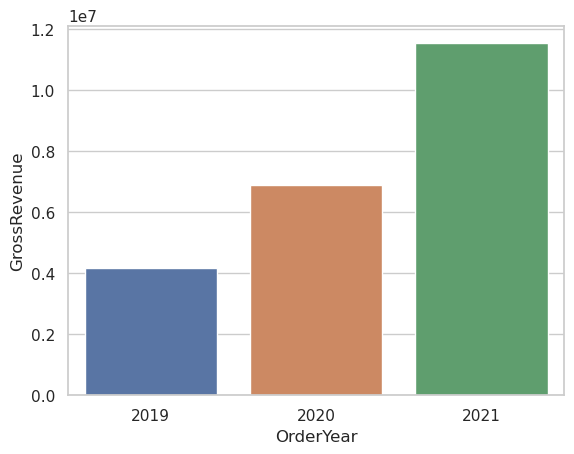

In [43]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

StatementMeta(, 3392359e-b119-4fa0-ad81-df868df854dd, 46, Finished, Available)

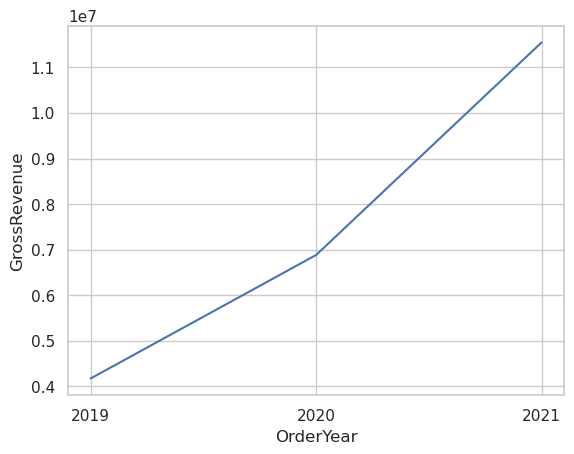

In [44]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a line chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()